In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d

In [2]:
def flight_score(w_payload, zone_mult, zone_std, zone_dist):
    e_exp = -1 * (zone_dist**2 / (2 * zone_std**2))
    e_div = zone_std * np.sqrt(2 * np.pi)
    b_pada = (np.e**e_exp * 5) / e_div
    
    #Add the weight score and the PADA score 
    score = w_payload + 8 * (zone_mult + b_pada)
    return score

def gtv_score(gtv_mult, gtv_payload):
    score = (gtv_mult * gtv_payload)/4
    return score
    
def total_score(w_payload, zone_mult, zone_std, zone_dist, gtv_mult, gtv_payload):
    score = 3 * flight_score(w_payload, zone_mult, zone_std, zone_dist) + gtv_score(gtv_mult, gtv_payload)
    return score



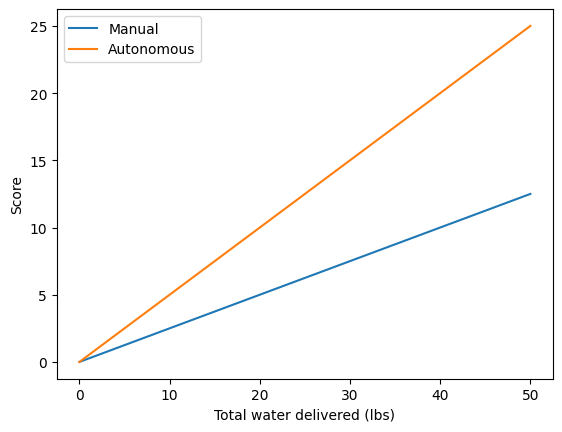

In [7]:
water_payload = np.linspace(0, 50, 50)
gtv_score_manual = gtv_score(1, water_payload)
gtv_score_auto = gtv_score(2, water_payload)

plt.plot(water_payload, gtv_score_manual, label="Manual")
plt.plot(water_payload, gtv_score_auto, label="Autonomous")
plt.xlabel("Total water delivered (lbs)")
plt.ylabel("Score")
plt.legend()
plt.show()

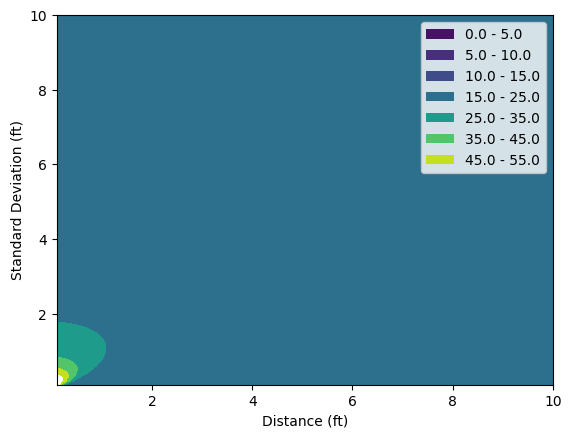

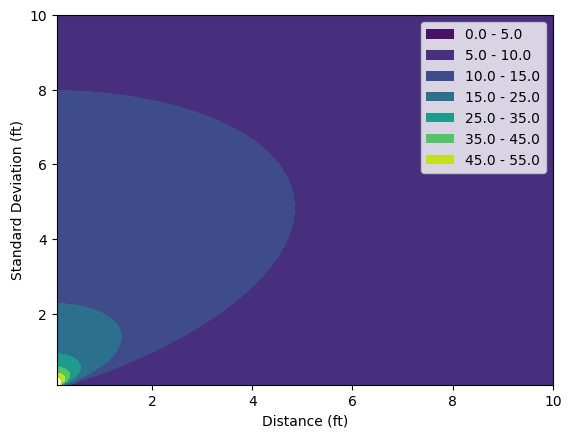

In [4]:
dist, std = np.meshgrid(np.linspace(0.1, 10, 100), np.linspace(0.1, 10, 100))

score_static = flight_score(0, 1, std, dist)
score_dynamic = flight_score(0, 2, std, dist)

#levels = np.linspace(min(score_dynamic.min(), score_static.min()), max(score_dynamic.max(), score_static.max()), 15)
levels = [0, 5, 10, 15, 25, 35, 45, 55]

dynplot = plt.contourf(dist, std, score_dynamic, levels=levels)
proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
    for pc in dynplot.collections]

plt.legend(proxy, [f"{lower:2.1f} - {upper:2.1f}" for lower, upper in zip(levels[:-1], levels[1:])])
plt.xlabel("Distance (ft)")
plt.ylabel("Standard Deviation (ft)")
#plt.title("Effects of distance and standard deviation on single flight score,\n random landing zone, no payload")
plt.savefig("graph-random.png", transparent=True)
plt.show()

statplot = plt.contourf(dist, std, score_static, levels=levels)
proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
    for pc in statplot.collections]

plt.legend(proxy, [f"{lower:2.1f} - {upper:2.1f}" for lower, upper in zip(levels[:-1], levels[1:])])
plt.xlabel("Distance (ft)")
plt.ylabel("Standard Deviation (ft)")
#plt.title("Effects of distance and standard deviation on single flight score,\n static landing zone, no payload")
plt.savefig("graph_static.png", transparent=True)
plt.show()

https://www.desmos.com/calculator/rox4bs75un